## Chapter 5

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           3.41e-41
Time:                        09:48:09   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8727      0.729     -3.941      0.0

(array([  7.,  37., 182., 172.,  70.,  35.,  11.,   4.,   4.,   4.]),
 array([-7.6067704 , -5.38073337, -3.15469634, -0.9286593 ,  1.29737773,
         3.52341476,  5.74945179,  7.97548883, 10.20152586, 12.42756289,
        14.65359993]),
 <a list of 10 Patch objects>)

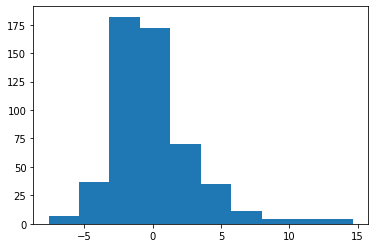

In [2]:
#Exercise C1
wage1 = pd.read_stata("stata/wage1.dta")

y = wage1.wage
X = sm.add_constant(wage1[["educ", "exper", "tenure"]])

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)
plt.hist(model.resid)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           9.13e-43
Time:                        09:48:09   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2844      0.104      2.729      0.0

(array([  1.,   1.,   5.,  20.,  91., 174., 138.,  70.,  19.,   7.]),
 array([-2.05801628, -1.70940549, -1.3607947 , -1.01218391, -0.66357312,
        -0.31496233,  0.03364847,  0.38225926,  0.73087005,  1.07948084,
         1.42809163]),
 <a list of 10 Patch objects>)

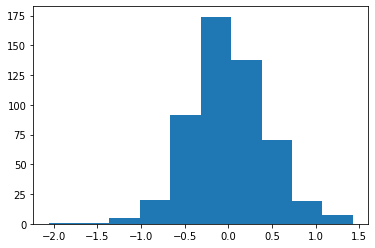

In [3]:
y = wage1.lwage

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)
plt.hist(model.resid)

Results from previous section are above and don't require exposition 

C1.iii The log-level model seems to meet the normality assumption better

In [4]:
#Exercise C2
gpa2 = pd.read_excel("excel/gpa2.xls", 
                     names = ["sat", "tothrs", "colgpa", "athlete", "verbmath", "hsize", "hsrank", "hsperc", "female", "white", "black", "hsizesq"],
                     sep = " ")

y = gpa2.colgpa
X = sm.add_constant(gpa2[["hsperc", "sat"]])

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)
m1_hsperc_se = model.bse[1]

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     777.2
Date:                Wed, 22 Apr 2020   Prob (F-statistic):          3.05e-287
Time:                        09:48:09   Log-Likelihood:                -3481.0
No. Observations:                4136   AIC:                             6968.
Df Residuals:                    4133   BIC:                             6987.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3919      0.072     19.453      0.0

In [5]:
gpa2_limit = gpa2[:2071] # Observation 2071 is not included

y = gpa2_limit.colgpa
X = sm.add_constant(gpa2_limit[["hsperc", "sat"]])

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)
m2_hsperc_se = model.bse[1]

                            OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     406.1
Date:                Wed, 22 Apr 2020   Prob (F-statistic):          1.68e-149
Time:                        09:48:09   Log-Likelihood:                -1660.5
No. Observations:                2071   AIC:                             3327.
Df Residuals:                    2068   BIC:                             3344.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4418      0.098     14.739      0.0

In [6]:
m1_hsperc_se / m2_hsperc_se

0.7644972590676542

In [7]:
np.sqrt(2070 / 4136)

0.7074486263992582

C2.iii Close? I'm unclear as to how close it should be

In [8]:
#Exercise C3
bwght = pd.read_stata("stata/bwght.dta").dropna()

y = bwght.bwght
X = sm.add_constant(bwght[["cigs", "parity", "faminc"]])

model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     14.95
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.47e-09
Time:                        09:48:09   Log-Likelihood:                -5243.7
No. Observations:                1191   AIC:                         1.050e+04
Df Residuals:                    1187   BIC:                         1.052e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.4699      1.656     69.733      0.0

In [9]:
restrict_resid = model.resid

In [10]:
y = restrict_resid
X = sm.add_constant(bwght[["cigs", "parity", "faminc", "motheduc", "fatheduc"]])
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5749
Date:                Wed, 22 Apr 2020   Prob (F-statistic):              0.719
Time:                        09:48:09   Log-Likelihood:                -5242.2
No. Observations:                1191   AIC:                         1.050e+04
Df Residuals:                    1185   BIC:                         1.053e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9456      3.728     -0.254      0.8

In [11]:
model.rsquared * model.nobs

2.8821005843631924

C3 We fail to reject the null that the two variables are jointly significant

In [12]:
#Exercise C4
ksubs = pd.read_stata("stata/401ksubs.dta")
ksubs_single = ksubs[ksubs.fsize == 1]
ksubs_single["linc"] = np.log(ksubs.inc)

print((((ksubs_single.inc - ksubs_single.inc.mean()) / ksubs_single.inc.std()) ** 3).sum() / (ksubs_single.inc.shape[0] - 1))
print((((ksubs_single.linc - ksubs_single.linc.mean()) / ksubs_single.linc.std()) ** 3).sum() / (ksubs_single.inc.shape[0] - 1))

1.8631844899011036
0.36076812138633124


/Users/systemchalk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
bwght2 = pd.read_stata("stata/bwght2.dta")
bwght2["lbwght"] = np.log(bwght2.bwght)

print((((bwght2.bwght - bwght2.bwght.mean()) / bwght2.bwght.std()) ** 3).sum() / (bwght2.bwght.shape[0] - 1))
print((((bwght2.lbwght - bwght2.lbwght.mean()) / bwght2.lbwght.std()) ** 3).sum() / (bwght2.lbwght.shape[0] - 1))

-0.6004840697737879
-2.9501819787684327


C4.i Log shows less skewness

C4.ii log shows more skewness

C4.iii As seen by ii, this is not true

C4.iv We should be studying conditional distributions.

[15 13 18 12 17 16 20 14 11  9  8 10 19  7  6]


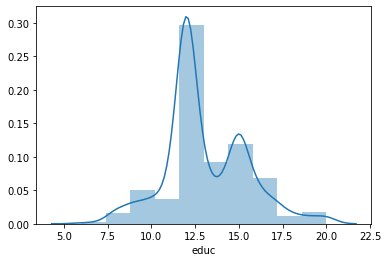

In [14]:
#Exercise C5
htv = pd.read_stata("stata/htv.dta")
htv["abil2"] = htv.abil ** 2

print(htv.educ.unique())

from scipy.stats import norm
import seaborn as sns

sns.distplot(htv.educ, bins = 10)
plt.show()

C5.i No, discrete values year over year (14 different values)

C5.ii Doesn't seem to be normal

C5.iii Error is not normal and so the errors may be incorrect